<a href="https://colab.research.google.com/github/Madhusudana-Rao/DMA-Crossover-Trading-Strategy/blob/main/DMA_Crossover_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving GOOGLE.csv to GOOGLE.csv


In [ ]:
#Storing data
GOOGLE =pd.read_csv('GOOGLE.csv')
#Showing data
GOOGLE


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-14,625.700012,625.859985,619.429993,623.239990,623.239990,1702300
1,2015-09-15,626.700012,638.700012,623.780029,635.140015,635.140015,2084400
2,2015-09-16,635.469971,637.950012,632.320007,635.979980,635.979980,1286500
3,2015-09-17,637.789978,650.900024,635.020020,642.900024,642.900024,2274700
4,2015-09-18,636.789978,640.000000,627.020020,629.250000,629.250000,5133400
...,...,...,...,...,...,...,...
1318,2020-12-07,1819.000000,1832.369995,1805.780029,1819.479980,1819.479980,1320900
1319,2020-12-08,1810.099976,1821.900024,1796.204956,1818.550049,1818.550049,1096300
1320,2020-12-09,1812.010010,1834.270020,1767.810059,1784.130005,1784.130005,1507600
1321,2020-12-10,1769.800049,1781.310059,1740.319946,1775.329956,1775.329956,1362800


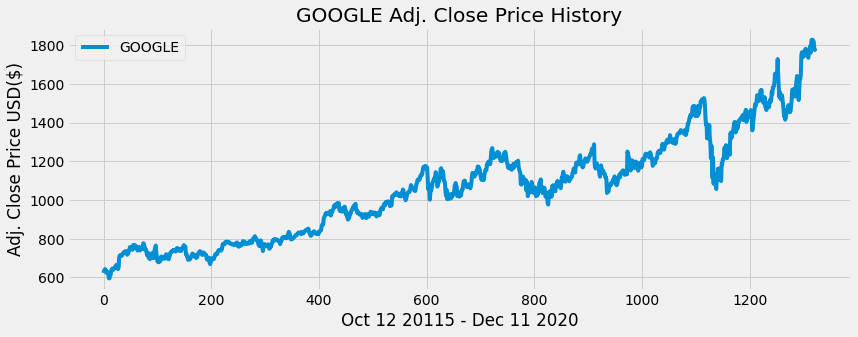

In [ ]:
#Visualizing data
plt.figure(figsize=(12.5,4.5))
plt.plot(GOOGLE['Adj Close'],label='GOOGLE')
plt.title('GOOGLE Adj. Close Price History')
plt.xlabel('Oct 12 20115 - Dec 11 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create simple moving average with 30day Window
SMA30 = pd.DataFrame()
SMA30['Adj. Close Price']=GOOGLE['Adj Close'].rolling(window=30).mean()
SMA30


,Adj. Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1318,1732.227995
1319,1739.831331
1320,1745.826998
1321,1754.450663


In [ ]:
#Create simple moving average with 100day Window
SMA100 = pd.DataFrame()
SMA100['Adj. Close Price']=GOOGLE['Adj Close'].rolling(window=100).mean()
SMA100


,Adj. Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1318,1592.546495
1319,1595.576495
1320,1597.760596
1321,1599.929695


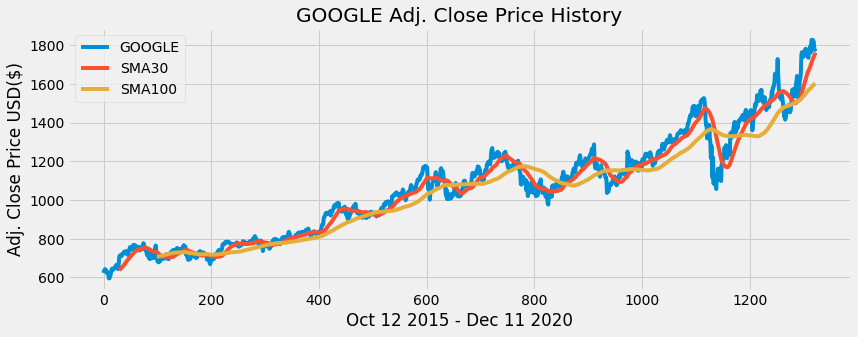

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(GOOGLE['Adj Close'],label='GOOGLE')
plt.plot(SMA30['Adj. Close Price'],label='SMA30')
plt.plot(SMA100['Adj. Close Price'],label='SMA100')
plt.title('GOOGLE Adj. Close Price History')
plt.xlabel('Oct 12 2015 - Dec 11 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data=pd.DataFrame()
data['GOOGLE']=GOOGLE['Adj Close']
data['SMA30']=SMA30['Adj. Close Price']
data['SMA100']=SMA100['Adj. Close Price']
data


,GOOGLE,SMA30,SMA100
0,623.239990,NaN,NaN
1,635.140015,NaN,NaN
2,635.979980,NaN,NaN
3,642.900024,NaN,NaN
4,629.250000,NaN,NaN
...,...,...,...
1318,1819.479980,1732.227995,1592.546495
1319,1818.550049,1739.831331,1595.576495
1320,1784.130005,1745.826998,1597.760596
1321,1775.329956,1754.450663,1599.929695


In [ ]:
#functionsiganl to indicate buy and sell
def buy_sell(data):
  sigPricebuy=[]
  sigPricesell=[]
  flag=-1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag !=1:
        sigPricebuy.append(data['GOOGLE'][i])
        sigPricesell.append(np.nan)
        flag=1
      else:
        sigPricebuy.append(np.nan)
        sigPricesell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPricebuy.append(np.nan)
        sigPricesell.append(data['GOOGLE'][i])
        flag=0
      else:
        sigPricebuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
        sigPricebuy.append(np.nan)
        sigPricesell.append(np.nan)


  return (sigPricebuy,sigPricesell )
        






        

In [ ]:
buy_sell=buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

In [ ]:
data

,GOOGLE,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,623.239990,NaN,NaN,NaN,NaN
1,635.140015,NaN,NaN,NaN,NaN
2,635.979980,NaN,NaN,NaN,NaN
3,642.900024,NaN,NaN,NaN,NaN
4,629.250000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1318,1819.479980,1732.227995,1592.546495,NaN,NaN
1319,1818.550049,1739.831331,1595.576495,NaN,NaN
1320,1784.130005,1745.826998,1597.760596,NaN,NaN
1321,1775.329956,1754.450663,1599.929695,NaN,NaN


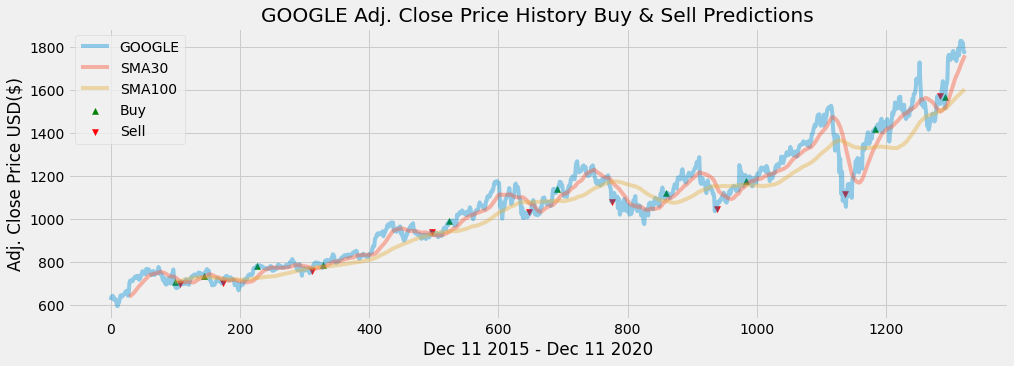

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['GOOGLE'],label='GOOGLE', alpha=0.40)
plt.plot(data['SMA30'],label='SMA30',alpha=0.40)
plt.plot(data['SMA100'],label='SMA100',alpha=0.40)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy',marker='^',color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell',marker='v',color='red')
plt.title('GOOGLE Adj. Close Price History Buy & Sell Predictions')
plt.xlabel('Dec 11 2015 - Dec 11 2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()
